In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_X = pd.read_csv('./data/logistic_x.txt', sep = "\ +", names = ["x1", "x2"], header = None, engine = 'python')

In [3]:
df_X.head()

,x1,x2
0,1.343250,-1.331148
1,1.820553,-0.634668
2,0.986321,-1.888576
3,1.944373,-1.635452
4,0.976734,-1.353315


In [4]:
df_y = pd.read_csv('./data/logistic_y.txt', sep = "\ +", names = ["y"], header = None, engine = 'python')

In [5]:
df_y.head()

,y
0,-1.0
1,-1.0
2,-1.0
3,-1.0
4,-1.0


In [27]:
x = np.hstack([np.ones((df_X.shape[0], 1)), df_X[["x1", "x2"]].values])
x.shape

(99, 3)

In [29]:
y = df_y["y"].values
y.shape

(99,)

## Plotting data

In [30]:
pos = df_y.index[df_y["y"] == 1].values
neg = df_y.index[df_y["y"] == -1].values


In [31]:
pos_x = x[pos]
neg_x = x[neg]
pos_x

array([[ 1.        ,  5.1708997 ,  1.2103667 ],
       [ 1.        ,  4.8795188 ,  1.6081848 ],
       [ 1.        ,  4.664987  ,  1.0695532 ],
       [ 1.        ,  4.4934321 ,  1.2351592 ],
       [ 1.        ,  4.1512967 ,  0.8672126 ],
       [ 1.        ,  3.717708  ,  1.15172   ],
       [ 1.        ,  3.6224477 ,  1.3106769 ],
       [ 1.        ,  3.0606943 ,  1.4857163 ],
       [ 1.        ,  7.0718465 , -0.34961651],
       [ 1.        ,  6.0391832 , -0.24756832],
       [ 1.        ,  6.674748  , -0.12484766],
       [ 1.        ,  6.8461291 ,  0.25977167],
       [ 1.        ,  6.4270724 , -0.14713863],
       [ 1.        ,  6.8456065 ,  1.4754967 ],
       [ 1.        ,  7.7054006 ,  1.6045555 ],
       [ 1.        ,  6.2870658 ,  2.4156427 ],
       [ 1.        ,  6.9810956 ,  1.2599865 ],
       [ 1.        ,  7.0990172 ,  2.2155151 ],
       [ 1.        ,  5.5275479 ,  0.29968421],
       [ 1.        ,  5.8303489 , -0.21974408],
       [ 1.        ,  6.3594527 ,  0.239

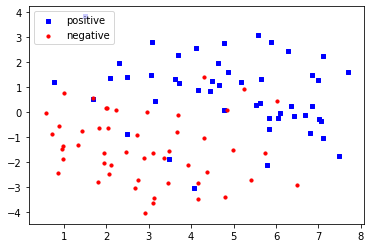

In [32]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(pos_x[:,1], pos_x[:,2], s=10, c='b', marker="s", label='positive')
ax1.scatter(neg_x[:,1], neg_x[:,2], s=10, c='r', marker="o", label='negative')
plt.legend(loc='upper left');
plt.show()

# Main model 

In [38]:
collected_thetas = [] # collect for demonstration purpose
theta = np.zeros(x.shape[1])

tol = 1e9
n_iters = 0
while tol > 1e-6:
    z = y * x.dot(theta)
    g = 1 / (1 + np.exp(-z))
    grad = np.mean((g - 1) * y * x.T, axis=1)
    
    # Refactor, more efficient way of calculating hessian
    hessian = np.zeros((x.shape[1], x.shape[1]))
    for i in range(hessian.shape[0]):
        for j in range(hessian.shape[0]):
            if i <= j:
                hessian[i][j] = np.mean(g * (1 - g) * x[:,i] * x[:,j])
                if i != j:
                    hessian[j][i] = hessian[i][j]
            
    delta = np.linalg.inv(hessian).dot(grad)
    old_theta = theta.copy()
    theta -= delta
    collected_thetas.append(theta.copy())
    n_iters += 1
    tol = np.sum(np.abs(theta - old_theta))
print('converged after {0} iterations'.format(n_iters))

converged after 7 iterations


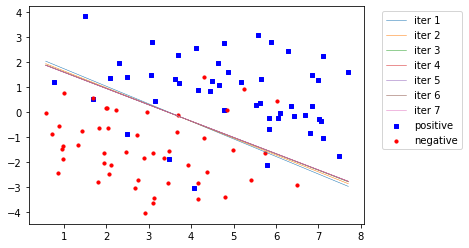

In [40]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(pos_x[:,1], pos_x[:,2], s=10, c='b', marker="s", label='positive')
ax1.scatter(neg_x[:,1], neg_x[:,2], s=10, c='r', marker="o", label='negative')

# df_X.query('label == -1').plot.scatter(x=0, y=1, ax=ax, color='blue')
# df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')

_xs = np.array([np.min(x[:,1]), np.max(x[:,1])])
for k, theta in enumerate(collected_thetas):
    _ys = (theta[0] + theta[1] * _xs) / (- theta[2])
    plt.plot(_xs, _ys, label='iter {0}'.format(k + 1), lw=0.5)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

In [45]:
collected_thetas

[array([-1.50983811,  0.43509696,  0.62161752]),
 array([-2.21834632,  0.64372727,  0.95944716]),
 array([-2.55431051,  0.74137714,  1.13493588]),
 array([-2.61847133,  0.75979248,  1.1707512 ]),
 array([-2.62050954,  0.76037096,  1.17194549]),
 array([-2.6205116 ,  0.76037154,  1.17194674]),
 array([-2.6205116 ,  0.76037154,  1.17194674])]